
# Investigate a Dataset - [Gapminder World]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Gapminder world dataset provides information on a variety of aspects about people\'s lives in different countries across the years. However I chose to focus on worldwide trends (through finding the mean of all countries values in each year in every indicator), rather than making comparisons between countries.

This investigation focuses on the number of children per woman, income per person, and infant mortality rates, each, compared to the literacy rates as the indepenent variable.


### Questions for Analysis
>Questions that I am looking for their answers from the dataset are the following: 
1. Is there a relation between adult literacy rates and the number of children per woman?
2. Does the income per person increase with the increase in literay rates?
3. Is there a relation between adult literacy rates and infant mortality rates? 


In [73]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling and Data Cleaning

In [75]:
#load all of the data
df_literacy = pd.read_csv('literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_infant_mortality = pd.read_csv('infant_mortality_rate_per_1000_births.csv')
df_children_per_woman = pd.read_csv('children_per_woman_total_fertility.csv')

- Ensure that all the data are taken from the same years.
- We will choose the literacy database years to be our reference, and save them to a variable.

In [76]:
#store the column names of df_literacy, upon which columns of all databases will be determined
cols = df_literacy.columns
cols

Index(['country', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011'],
      dtype='object')

- Replace all **k** letters in the income dataframe with integers to be able to find the true mean values.

In [77]:
#fix the income data
df_income=df_income.set_index('country').apply(lambda x: x.replace({'k': '*1e3'},regex=True).map(pd.eval).astype(int),axis=1).reset_index()

- For each dataframe, this function allows us to:
 - select the specified column years
 - drop duplicates
 - replace missing values with the average
 - set the index to **country**
 - find the mean of each column
 - set a name for the average values
 - put them into a dataframe
- Call the function to each dataframe and join the results each time.
- View the first 5 rows of the newly formed dataframe.

In [78]:
def cleanData(df,cols,name):
    """
    Cleans and matches the data and joins the results in a dataframe.
    
    inputs: df - dataframe
            cols - columns of the specified dataframe
      (str) name - name that we choose to set for the newly created column
      
    output: Pandas DataFrame containing the mean of the values in each dataframe filtered by years (as the index), joined together
   
    """
    #select the required columns
    temp=df[cols].copy()
    
    #drop duplicates if there are any
    df.drop_duplicates(inplace=True)
    
    #replace missing values with mean
    df.fillna(df.mean(), inplace=True)
    
    #get average of rows (after setting index to 'country'), rename the set and put them in a dataframe
    return temp.set_index('country').mean().rename(name).to_frame()

final=cleanData(df_literacy,cols,'literacy_worldwide').join(cleanData(df_income,cols,'income_worldwide')).join(cleanData(df_infant_mortality,cols,'infant_mortality_worldwide')).join(cleanData(df_children_per_woman,cols,'child_per_woman_worldwide'))
final.head()
    
    

,literacy_worldwide,income_worldwide,infant_mortality_worldwide,child_per_woman_worldwide
1975,49.248333,11213.302564,73.853049,4.825545
1976,49.061429,11553.000000,72.674699,4.759257
1977,82.300000,11666.128205,70.687425,4.695891
1978,68.450000,11851.020513,68.937059,4.635594
1979,40.100000,12255.323077,67.219653,4.581683


<a id='eda'></a>
## Exploratory Data Analysis

#### Visualize relatioships between the data  

- Observe the general relationships between all the factors in the *final* data frame.

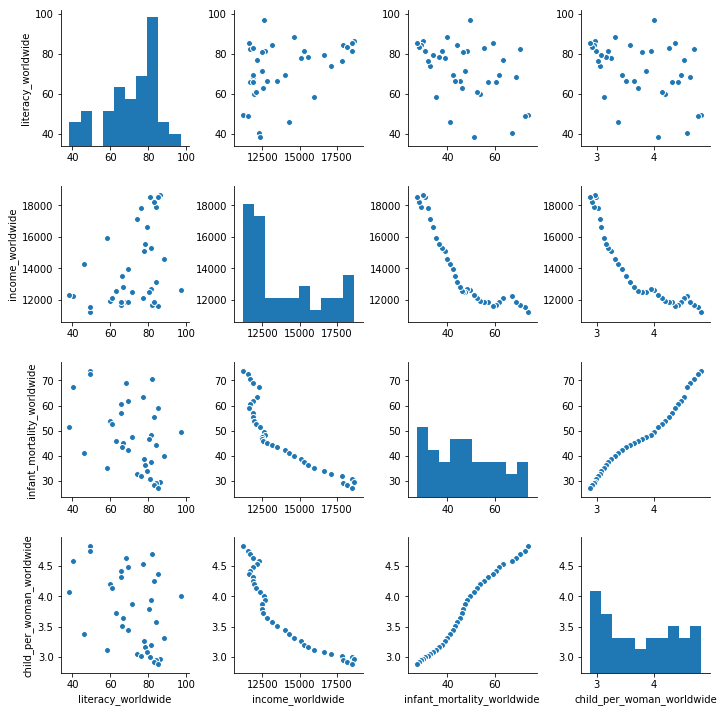

In [79]:
#scatter plot
sns.pairplot(final, kind='scatter')
plt.show()

- The following function allows us to plot a histogram that compares the values in the first and last years in the data provided, 1975 & 2011, for each factor in the data we are investigating.
- This gives us a general outlook on how things have changed (or not) from the beginning till the end of the study.

In [80]:
def HistPlot(df,years,title):
    """
    inputs: dataframe, year, name for title
    outout: histogram plot 
    
    """
    
    #plot
    df[years[0]].hist(grid=False,bins=20,edgecolor='black',figsize=[14,6], label=f'{years[0]}', color='lightblue');
    df[years[1]].hist(grid=False,bins=20,edgecolor='black',figsize=[14,6], label=f'{years[1]}', color='pink');
    #add title and format it
    plt.title(f'Distribution of {title}: {years[0]} & {years[1]}'.title(), fontsize=14, weight="bold")
    #add x label and format it
    plt.xlabel(title.title(), fontsize=10, weight="bold")
    #add y label and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight="bold")

### Research Question 1 (Is there a relationship between adult literacy rates and the number of children per woman?)

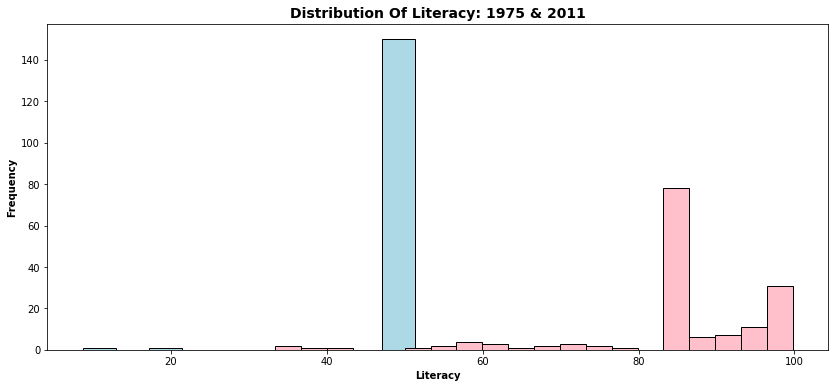

In [81]:
#plot histogram of df_literacy
HistPlot(df_literacy,['1975','2011'],'literacy')

- The graph above shows that the rates and frequency of literacy have significantly increased in 2011 compared to 1975.

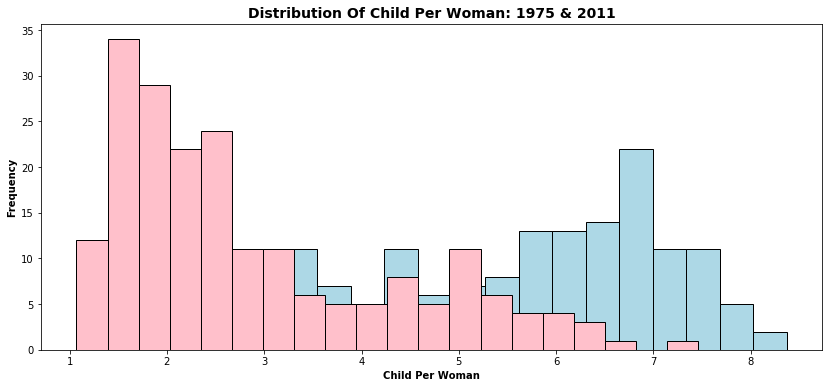

In [82]:
#plot histogram of df_children_per_woman  
HistPlot(df_children_per_woman,['1975','2011'],'Child Per Woman')

- The graph above shows that the number of children per woman has decreased remarkably in 2011 compared to in 1975.

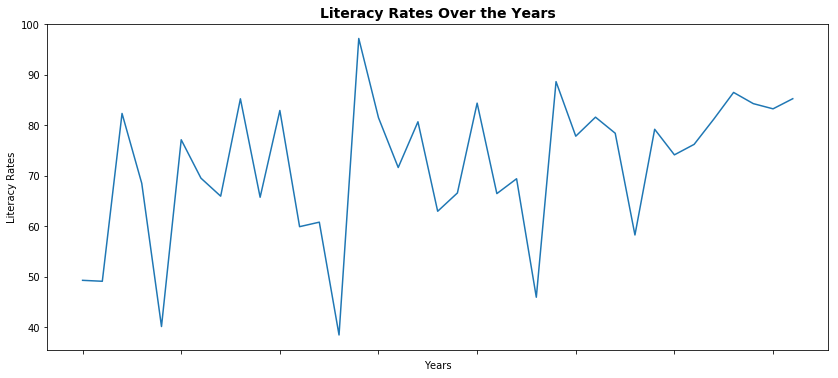

In [83]:
#plot
final['literacy_worldwide'].plot(figsize=[14, 6])
#add x label
plt.xlabel('Years') 
#add y label
plt.ylabel('Literacy Rates') 
#add title
plt.title('Literacy Rates Over the Years', fontsize=14, weight="bold");

- The graph above shows that the literacy rates have been fluctuating over the years.

Text(0.5,1,'Num. of Children Per Woman Vs Literacy Rates')

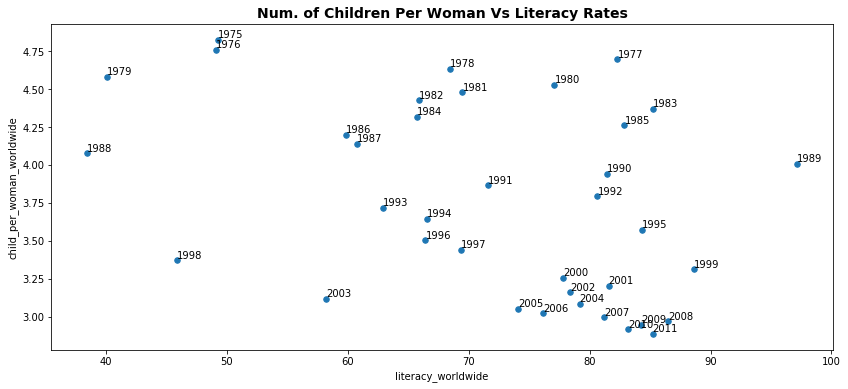

In [84]:
#plot
final.plot.scatter(x='literacy_worldwide', y='child_per_woman_worldwide', figsize=[14, 6], s=30);
#add labels for each point
for label, x, y in zip(final.index, final['literacy_worldwide'], final['child_per_woman_worldwide']):
    plt.annotate(label, 
                 (x, y),
                 va='bottom',
                 ha='left')
#add title
plt.title('Num. of Children Per Woman Vs Literacy Rates', fontsize=14, weight="bold") 

- We can't observe any pattern between adult literacy rates and the number of children per woman.

### Research Question 2  (Does the income per person increase with the increase in literay rates?)

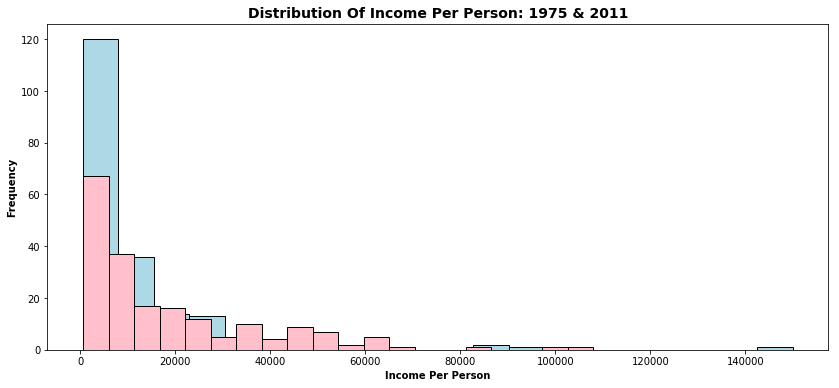

In [85]:
#plot histogram of df_children_per_woman  
HistPlot(df_income,['1975','2011'],'Income Per Person')

- The graph above shows that the income per person in 2011 is more diversified, higher and more evenly distributed than in 1975.

Text(0.5,1,'Income Vs Literacy Rates')

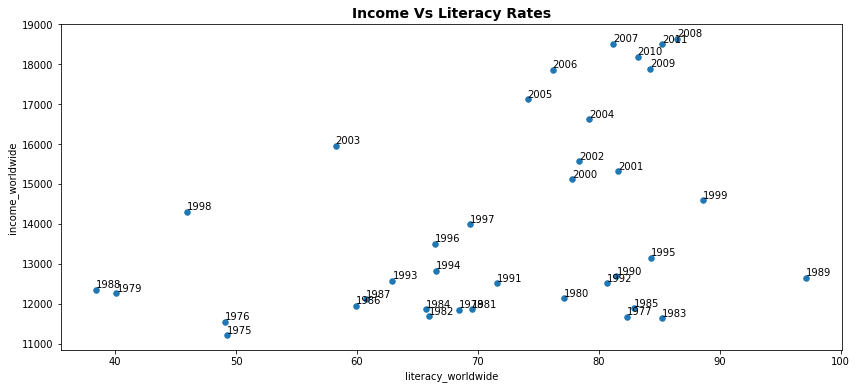

In [86]:
#plot
final.plot.scatter(x='literacy_worldwide', y='income_worldwide', figsize=[14, 6], s=30);
#add labels for each point
for label, x, y in zip(final.index, final['literacy_worldwide'], final['income_worldwide']):
    plt.annotate(label, 
                 (x, y),
                 va='bottom',
                 ha='left')
#add title
plt.title('Income Vs Literacy Rates', fontsize=14, weight="bold")    

- We can observe that when literacy rates were in the range from almost 60% to 85%, income per person is the highest.

### Research Question 3 (Is there a relationship between adult literacy rates and infant mortality rates?)

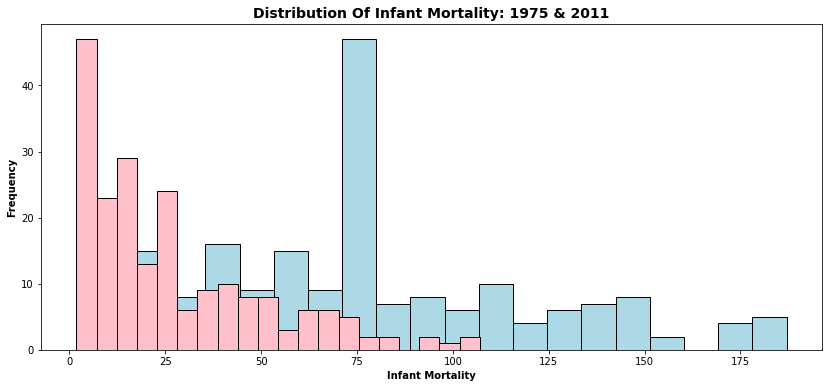

In [87]:
#plot histogram of df_infant_mortality
HistPlot(df_infant_mortality,['1975','2011'],'Infant Mortality')

- Infant mortality rates decreased in 2011 compared to in 1975.

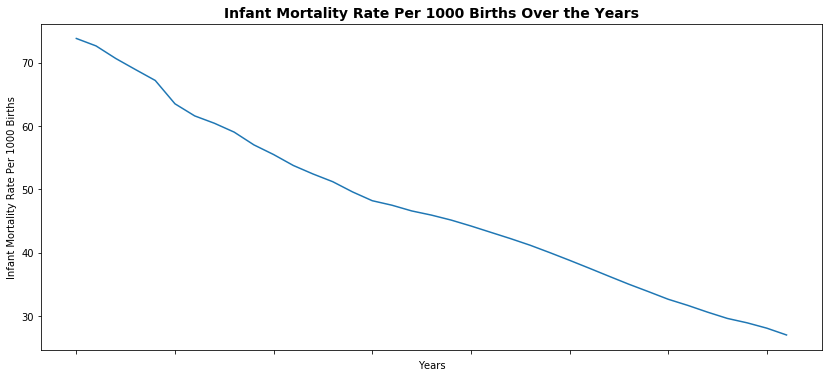

In [88]:
#plot
final['infant_mortality_worldwide'].plot(figsize=[14, 6])
#add x label
plt.xlabel('Years') 
#add y label
plt.ylabel('Infant Mortality Rate Per 1000 Births') 
plt.title('Infant Mortality Rate Per 1000 Births Over the Years', fontsize=14, weight="bold");

- Infant mortality rates have significantly dropped over the years.

Text(0.5,1,'Infant Mortality Rate Vs Literacy Rates')

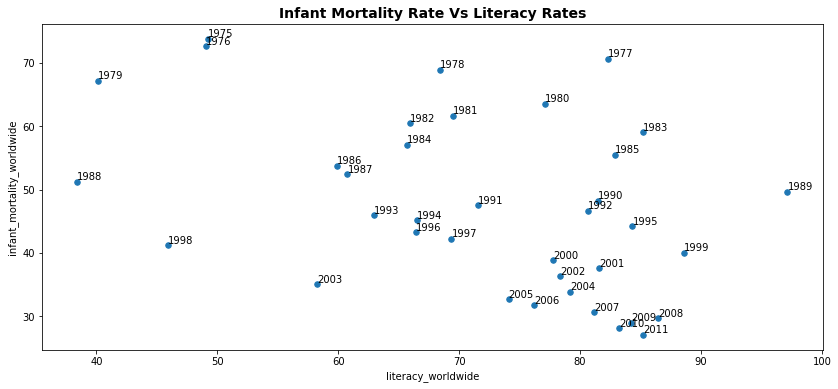

In [89]:
#plot
final.plot.scatter(x='literacy_worldwide', y='infant_mortality_worldwide', figsize=[14, 6], s=30);
#add labels for each point
for label, x, y in zip(final.index, final['literacy_worldwide'], final['infant_mortality_worldwide']):
    plt.annotate(label, 
                 (x, y),
                 va='bottom',
                 ha='left')
#add title
plt.title('Infant Mortality Rate Vs Literacy Rates', fontsize=14, weight="bold") 

- We can not observe any relationship between the 2 variables.
- *Note: we can conclude from the plot that the infant mortality rates are almost the lowest in the final decade.*

<a id='conclusions'></a>
## Conclusions

From this data analysis we can conclude the following regarding each addresed question:

1. Is there a relationship between adult literacy rates and the number of children per woman?
 - We can not observe any relationship between the 2 variables; there isn't any identifiable pattern from the graph. 
 - When we investigate each variable on its own, we can clearly observe that the number of children per woman has decreased over the years from 1975 to 2011, while the income per person is fluctuating.

2. Does the income per person increase with the increase in literay rates?
 - We can observe that the times when the literacy rates were in the range from almost 60% to 85%, income per person is the highest. So the income per person increases with the increase in literacy rates but to a certain extent.
 - However, we must take into consideration that the income values are taken from different countries where an income value can be consdered low in a developed country and high compared to a developing country. So we can't depend on the numbers solely, a lot of other factors must be looked into and further classification of countries would give more accurate and closer to reality conclusions. 

3. Is there a relationship between adult literacy rates and infant mortality rates?
 - We can not observe any relationship between the 2 variables. 
 - When we investigate the infant mortality rate/1000 births variable, we can clearly observe that the rates have decreased over the years. But further investigation needs to be done to find the causes of this phenomenon.

- An important observation has to be noted: from the scatter plot showing the relationship between all the dataframe's variables, a direct positive relationship was observed between the number of children born per woman and the infant mortality rates
- Another observation is that the number of children born per woman and the infant mortality rates decrease as the income per person increases.
- *Note:*
  - *A significant limitation in the investigation is that the methods of collecting the data and counting and making statistics is more accurate and inclusive in the latest years of the study than it was in the earlier years.*
  - *Another limitation is that the collected data are taken from a sample of the communities, and if the data are collected from a different sample, results may have differed.*
  - *And a lot of data were missing which doesn't lead to an accurate, closest to reality conclusions.*

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0